In [2]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [122]:
import numpy as np
import pandas as pd
import ants 
import os
from matplotlib import pyplot as plt
from tqdm import tqdm

In [98]:
indir = '../../data/ABIDE/Derivatives/cpac_nofilt_global/'
subs  = [file for file in os.listdir(indir) if file.startswith('sub-')]
subs.sort()

print(len(subs))
subs[0:10]

1102


['sub-CMUa0050642',
 'sub-CMUa0050646',
 'sub-CMUa0050647',
 'sub-CMUa0050649',
 'sub-CMUa0050653',
 'sub-CMUa0050654',
 'sub-CMUa0050656',
 'sub-CMUa0050659',
 'sub-CMUa0050660',
 'sub-CMUa0050663']

In [99]:
df = pd.read_csv('../Data/ABIDE_df2.csv')

In [100]:
epi_rois = ants.image_read('../Data/YeoAtlas/epi_rois.nii.gz')

In [101]:
s = 10
sub = subs[s];print(sub)

sub-CMUa0050664


In [94]:
#ants.slice_image(epi,axis=3,idx=0).plot_ortho(flat=True,xyz_lines=False,orient_labels=False)

In [166]:
rois = epi_rois.numpy().reshape(-1)
nrois = 51
ofdir = '../Assets/abide_1_cmats'
for s in tqdm(range(len(subs))):
    sub = subs[s]
    fn = os.path.join(indir,sub,'ses-1','func',f'{sub}_ses-1_preproc.nii.gz')
    ofn = os.path.join(ofdir,sub+'.npy')
    
    if not os.path.exists(ofn):    
        epi = ants.image_read(fn)
        epi_mat = epi.numpy().reshape(-1,epi.shape[-1])

        assert np.isnan(epi_mat).sum()==0, 'nans'

        roi_mat = np.array([epi_mat[rois==i,:].mean(axis=0) for i in range(nrois)])
        
        #assert np.isnan(roi_mat).sum()==0, 'nans'
        
        cmat = np.corrcoef(roi_mat)
        
        #assert np.isnan(cmat).sum()==0, 'nans'
        
        np.save(file=ofn,arr=cmat)

  0%|          | 0/1102 [00:00<?, ?it/s]/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide

100%|██████████| 1102/1102 [54:25<00:00,  2.96s/it] 


In [112]:
ofdir = '../Assets/abide_1_cmats'
cmat_files = os.listdir(ofdir)
cmats = np.array([np.load(os.path.join(ofdir,cmat_file)) for cmat_file in cmat_files])

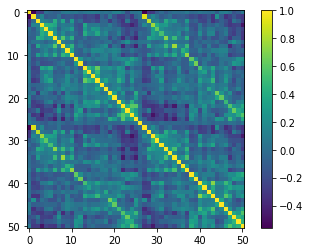

In [120]:
plt.imshow(cmats.mean(axis=0))
plt.colorbar()

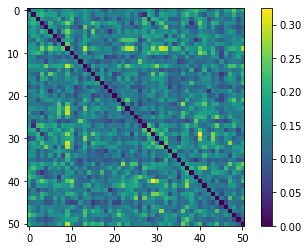

In [119]:
plt.imshow(cmats.std(axis=0))
plt.colorbar()